# Data Cleaning and Exploratory Data Analysis (EDA) on Titanic Dataset

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Loading the Dataset
df = pd.read_csv('test.csv')

In [51]:
# Displaying the First Few Rows of the Dataset
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
# Getting Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [53]:
# Checking for Missing Values
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Filling Missing Age Values with Median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [55]:
# Filling Missing Embarked Values with Mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [56]:
# Dropping the Cabin Column
df.drop(columns='Cabin', inplace=True)

In [57]:
# Encoding Gender as Numeric Values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [68]:
# Check the columns in the DataFrame
print(df.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S_True'],
      dtype='object')


In [69]:
# Display the first few rows of the DataFrame
print(df.head())

   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

    Age  SibSp  Parch   Ticket     Fare  Embarked_Q  Embarked_S_True  
0  34.5      0      0   330911   7.8292        True            False  
1  47.0      1      0   363272   7.0000       False             True  
2  62.0      0      0   240276   9.6875        True            False  
3  27.0      0      0   315154   8.6625       False             True  
4  22.0      1      1  3101298  12.2875       False             True  


In [70]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [74]:
# Convert 'Embarked' into numeric values using get_dummies
df = pd.get_dummies(df, columns=['Embarked_Q'], drop_first=True)

In [75]:
# Generating Descriptive Statistics
df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,0.363636,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.841838,0.481622,12.703770,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


# Correlation Matrix

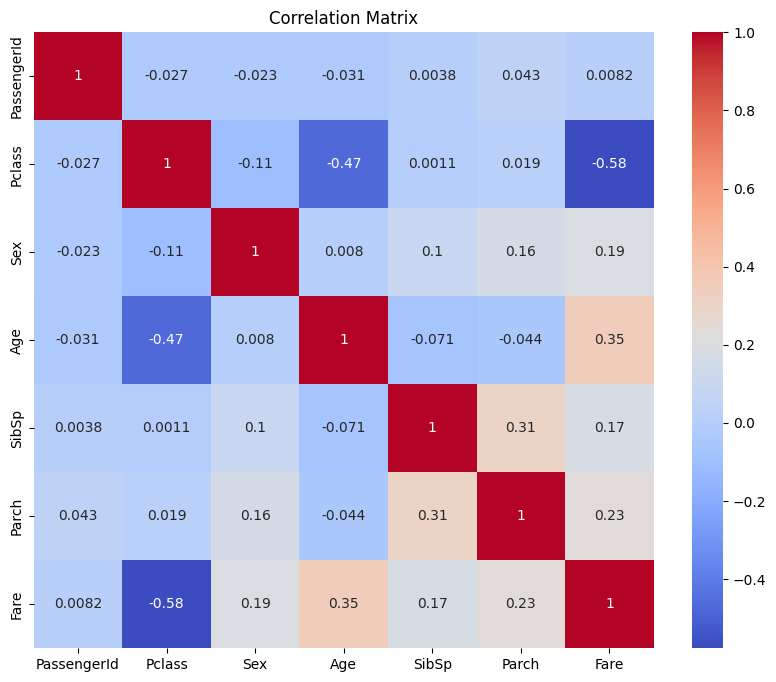

In [76]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Age

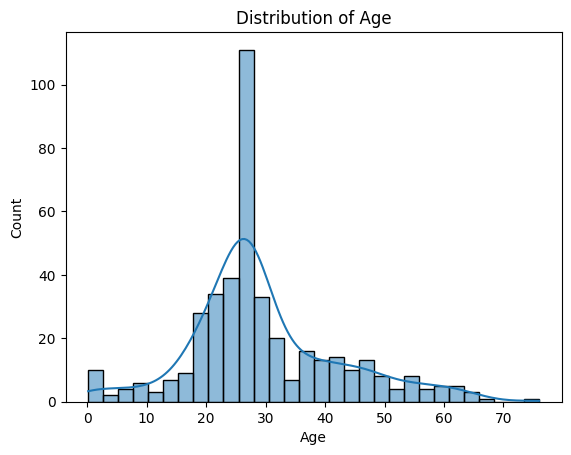

In [77]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

# Distribution of Fare

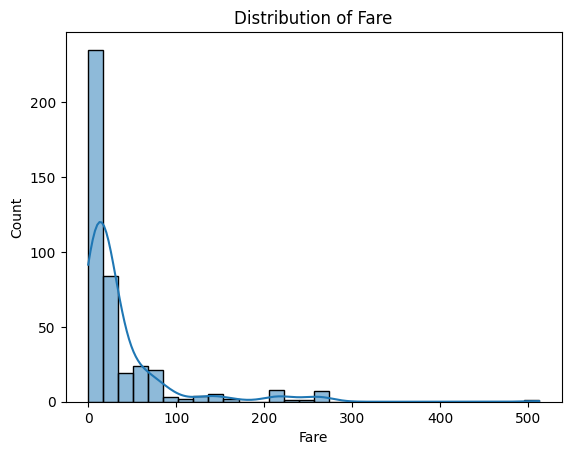

In [78]:
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.show()

# Distribution of Passenger Class

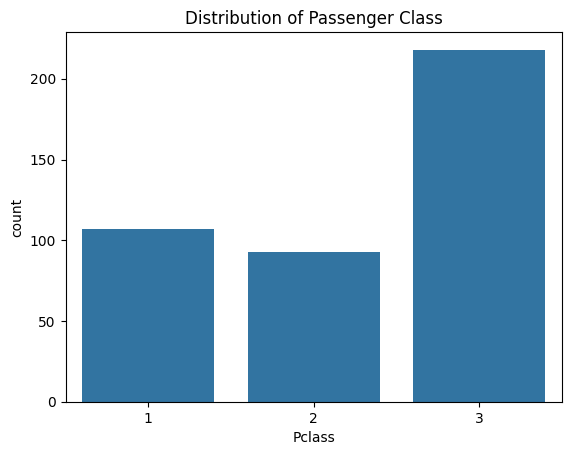

In [79]:
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Passenger Class')
plt.show()

# Distribution of Gender

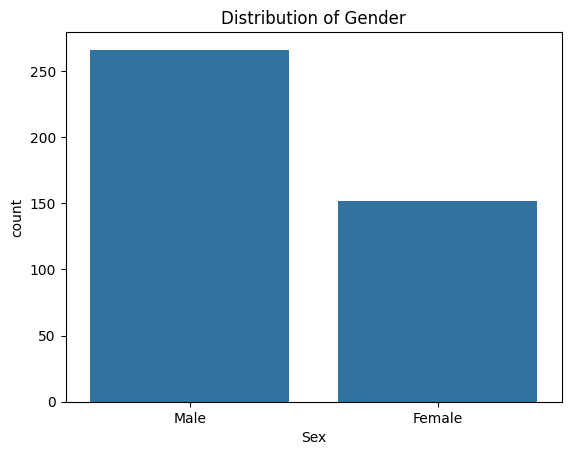

In [80]:
sns.countplot(x='Sex', data=df)
plt.title('Distribution of Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

In [82]:
# Check unique values in PassengerId
unique_passengers = df['PassengerId'].nunique()
print(f'Number of unique passengers: {unique_passengers}')

Number of unique passengers: 418


In [84]:
# Extract titles from the Name column using a raw string
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.')

# Distribution of Titles

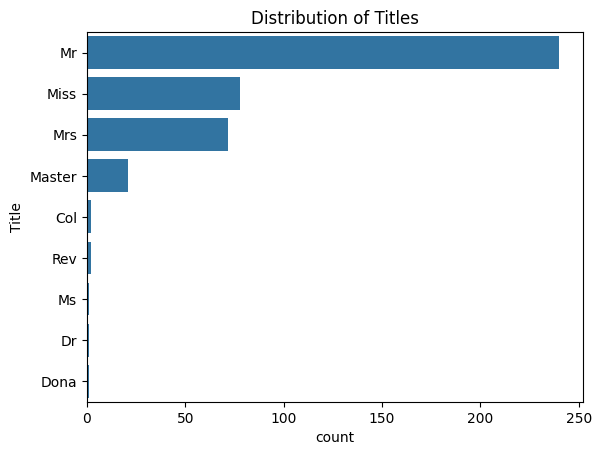

In [85]:
# Extract titles from the Name column
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.')

# Display the distribution of titles
sns.countplot(y='Title', data=df, order=df['Title'].value_counts().index)
plt.title('Distribution of Titles')
plt.show()

# Distribution of Siblings/Spouses Aboard

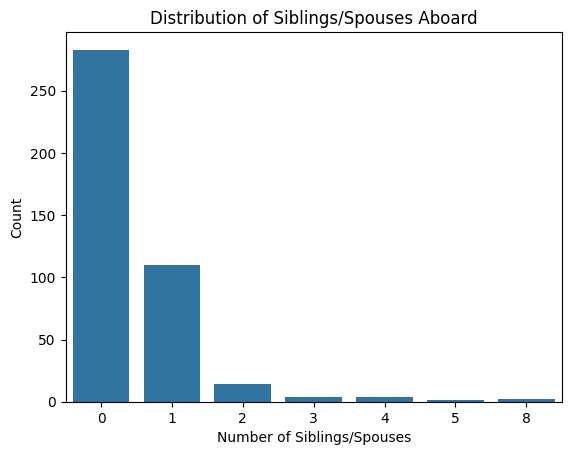

In [86]:
# Plot the distribution of SibSp
sns.countplot(x='SibSp', data=df)
plt.title('Distribution of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()

# Distribution of Parents/Children Aboard

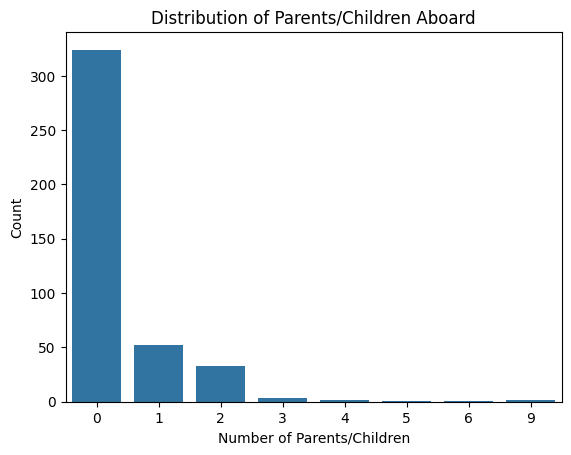

In [87]:
# Plot the distribution of Parch
sns.countplot(x='Parch', data=df)
plt.title('Distribution of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count')
plt.show()

# Analyzing Ticket Information

In [88]:
# Check the number of unique tickets
unique_tickets = df['Ticket'].nunique()
print(f'Number of unique tickets: {unique_tickets}')

# Count the number of occurrences of each ticket
ticket_counts = df['Ticket'].value_counts()
print(ticket_counts.head(10))  # Display the top 10 most common tickets

Number of unique tickets: 363
Ticket
PC 17608              5
CA. 2343              4
113503                4
347077                3
SOTON/O.Q. 3101315    3
PC 17483              3
16966                 3
C.A. 31029            3
220845                3
21228                 2
Name: count, dtype: int64
